In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('CMO-Historical-Data-Annual.xlsx', sheet_name='Annual Prices (Nominal)', skiprows=6)

df.head()

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian **","Coal, South Afican **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
1,NaN,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
2,1960.0,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
3,1961.0,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
4,1962.0,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725


In [4]:
# rename the first column to 'Year'
df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
df.head()

,Year,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian **","Coal, South Afican **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
1,NaN,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
2,1960.0,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
3,1961.0,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
4,1962.0,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725


In [5]:
## remove the first 2 rows and reindex
df = df[2:]
df.reset_index(drop=True, inplace=True)
df.head()

,Year,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian **","Coal, South Afican **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,1960.0,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
1,1961.0,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
2,1962.0,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725
3,1963.0,1.5,1.5,1.5,…,…,…,0.16,0.391351,…,...,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964.0,1.45,1.45,1.45,…,…,…,0.15,0.38415,…,...,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.1,88.480833,1.293


In [6]:
## list all of the column titles
df_gold = df[['Year', 'Gold']]

df_gold.head()

,Year,Gold
0,1960.0,35.27
1,1961.0,35.25
2,1962.0,35.23
3,1963.0,35.09
4,1964.0,35.1


In [7]:
# now take the value of gold from 1960 and divide every value in the column by that value to make it a percentage
df_gold['Gold'] = df_gold['Gold'].div(df_gold['Gold'].iloc[0]).mul(100)
df_gold.head()

,Year,Gold
0,1960.0,100.0
1,1961.0,99.943295
2,1962.0,99.886589
3,1963.0,99.489651
4,1964.0,99.518004


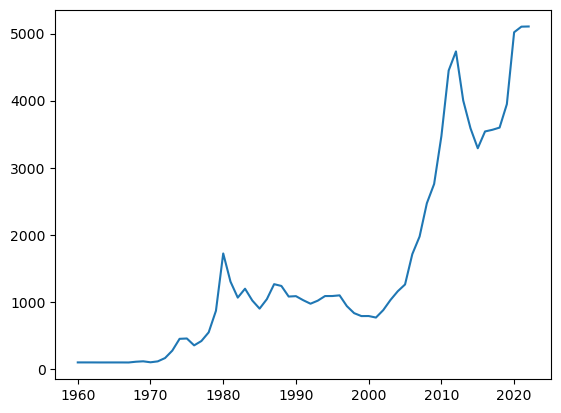

In [8]:
# graph the data
plt.plot(df_gold['Year'], df_gold['Gold'])

In [9]:
coke_df = pd.read_csv('Coca-Cola_stock_history copy.csv')

coke_df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
...,...,...,...,...,...,...,...,...
15306,2022-10-20 00:00:00-04:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0
15307,2022-10-21 00:00:00-04:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0
15308,2022-10-24 00:00:00-04:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0
15309,2022-10-25 00:00:00-04:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0


In [10]:
# in the "Date" column, make every value only be in the form XXXX-XX-XX and remove anything else in the string
coke_df['Date'] = coke_df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
coke_df



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
...,...,...,...,...,...,...,...,...
15306,2022-10-20,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0
15307,2022-10-21,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0
15308,2022-10-24,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0
15309,2022-10-25,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0


In [11]:
# Convert the 'Date' column to a datetime object
coke_df['Date'] = pd.to_datetime(coke_df['Date'])
coke_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0
...,...,...,...,...,...,...,...,...
15306,2022-10-20,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0
15307,2022-10-21,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0
15308,2022-10-24,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0
15309,2022-10-25,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0


In [12]:
# Split the 'Date' column into 'Year', 'Month', and 'Day' columns
coke_df['Year'] = coke_df['Date'].dt.year
coke_df['Month'] = coke_df['Date'].dt.month
coke_df['Day'] = coke_df['Date'].dt.day
coke_df

# Perform a left join on the 'Year' column of the 'coke_df' and 'df_gold' dataframes
coke_gold_df = pd.merge(coke_df, df_gold, on='Year', how='left')
coke_gold_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Gold
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0,1962,1,2,99.886589
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0,1962,1,3,99.886589
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0,1962,1,4,99.886589
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0,1962,1,5,99.886589
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0,1962,1,8,99.886589
...,...,...,...,...,...,...,...,...,...,...,...,...
15306,2022-10-20,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0,2022,10,20,5105.195634
15307,2022-10-21,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0,2022,10,21,5105.195634
15308,2022-10-24,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0,2022,10,24,5105.195634
15309,2022-10-25,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0,2022,10,25,5105.195634


In [13]:
coke_gold_df['Open'] = coke_gold_df['Open'].div(coke_gold_df['Open'].iloc[0]).mul(100)
coke_gold_df['High'] = coke_gold_df['High'].div(coke_gold_df['High'].iloc[0]).mul(100)
coke_gold_df['Low'] = coke_gold_df['Low'].div(coke_gold_df['Low'].iloc[0]).mul(100)
coke_gold_df['Close'] = coke_gold_df['Close'].div(coke_gold_df['Close'].iloc[0]).mul(100)

coke_gold_df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Gold
0,1962-01-02,100.000000,100.000000,100.000000,100.000000,806400,0.0,0,1962,1,2,99.886589
1,1962-01-03,98.514939,95.903855,96.286978,97.772025,1574400,0.0,0,1962,1,3,99.886589
2,1962-01-04,98.019912,96.626685,98.019912,98.514931,844800,0.0,0,1962,1,4,99.886589
3,1962-01-05,98.514907,97.108560,96.039439,96.286948,1420800,0.0,0,1962,1,5,99.886589
4,1962-01-08,95.544457,93.012104,93.440438,95.296947,2035200,0.0,0,1962,1,8,99.886589
...,...,...,...,...,...,...,...,...,...,...,...,...
15306,2022-10-20,111504.500117,108841.086986,109885.012970,110124.942081,16905100,0.0,0,2022,10,20,5105.195634
15307,2022-10-21,109964.989347,109210.902308,109944.999071,111884.376412,15028000,0.0,0,2022,10,21,5105.195634
15308,2022-10-24,113243.944173,112364.021947,113103.989332,115103.352775,17416700,0.0,0,2022,10,24,5105.195634
15309,2022-10-25,118042.419494,115050.016607,115463.238814,117862.476465,28829900,0.0,0,2022,10,25,5105.195634


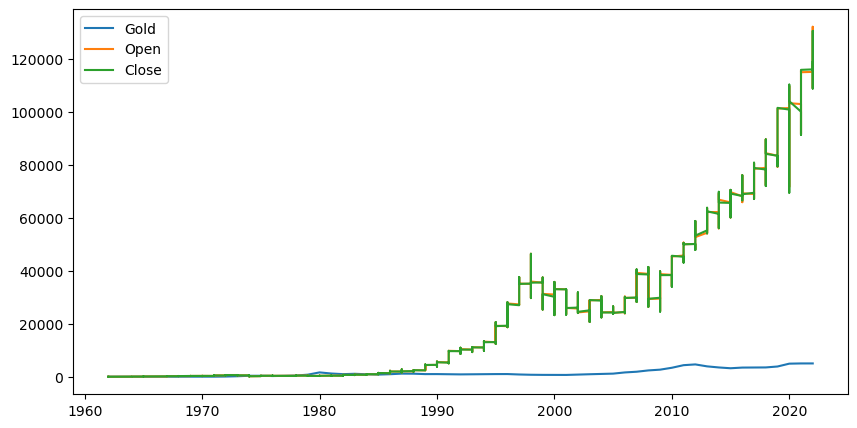

In [14]:
# Plot the 3 graphs on the same plot of the 'Year' vs 'Gold', 'Year' vs 'Open' and 'Year' vs 'Close'
plt.figure(figsize=(10, 5))
plt.plot(coke_gold_df['Year'], coke_gold_df['Gold'])
plt.plot(coke_gold_df['Year'], coke_gold_df['Open'])
plt.plot(coke_gold_df['Year'], coke_gold_df['Close'])
plt.legend(['Gold', 'Open', 'Close'])
plt.show()


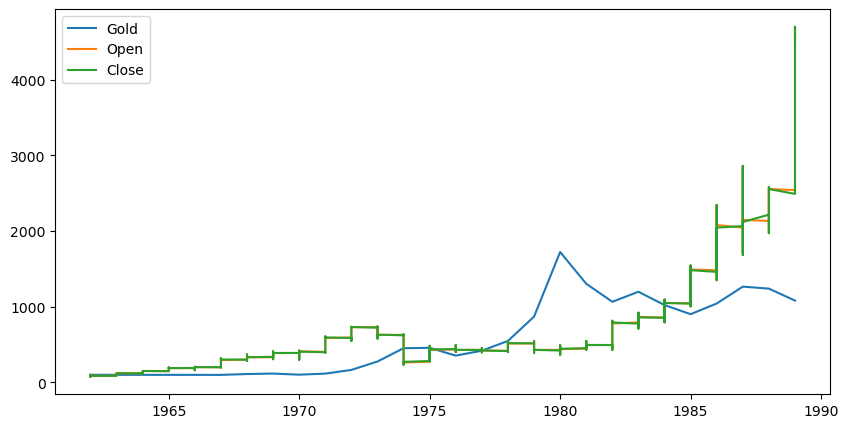

In [15]:
# make a new dataframe that is only from 1960 to 1989
coke_gold_df_1960 = coke_gold_df[(coke_gold_df['Year'] >= 1960) & (coke_gold_df['Year'] <= 1989)]


# Plot this again but only look at value from 1960 to 1989
plt.figure(figsize=(10, 5))
plt.plot(coke_gold_df_1960['Year'], coke_gold_df_1960['Gold'])
plt.plot(coke_gold_df_1960['Year'], coke_gold_df_1960['Open'])
plt.plot(coke_gold_df_1960['Year'], coke_gold_df_1960['Close'])
plt.legend(['Gold', 'Open', 'Close'])
plt.show()


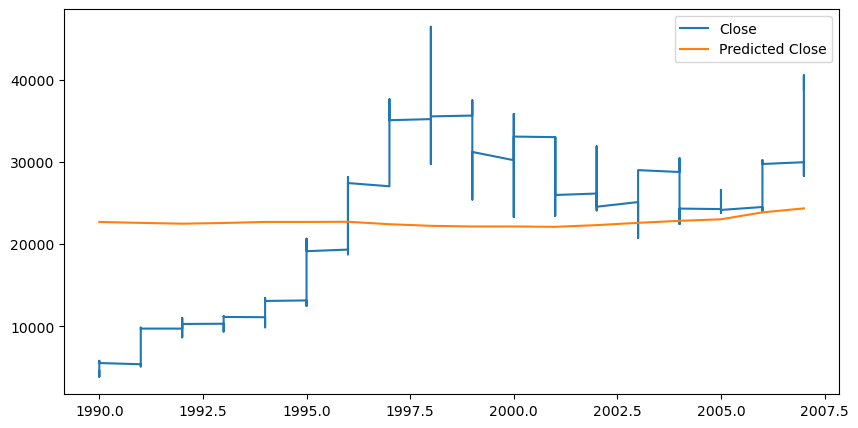

In [16]:
# run some type of ML model to prdict the price of coke for 1990
from sklearn.linear_model import LinearRegression

# create a new dataframe that is only from 1990 to 2007
coke_gold_df_1990 = coke_gold_df[(coke_gold_df['Year'] >= 1990) & (coke_gold_df['Year'] <= 2007)]


# create a new Linear Regression model
model = LinearRegression()

# fit the model to the data
model.fit(coke_gold_df_1990[['Gold']], coke_gold_df_1990['Close'])

# predict the price of coke for 2008
model.predict([[100]])

# graph it
plt.figure(figsize=(10, 5))
plt.plot(coke_gold_df_1990['Year'], coke_gold_df_1990['Close'])
plt.plot(coke_gold_df_1990['Year'], model.predict(coke_gold_df_1990[['Gold']]))
plt.legend(['Close', 'Predicted Close'])
plt.show()



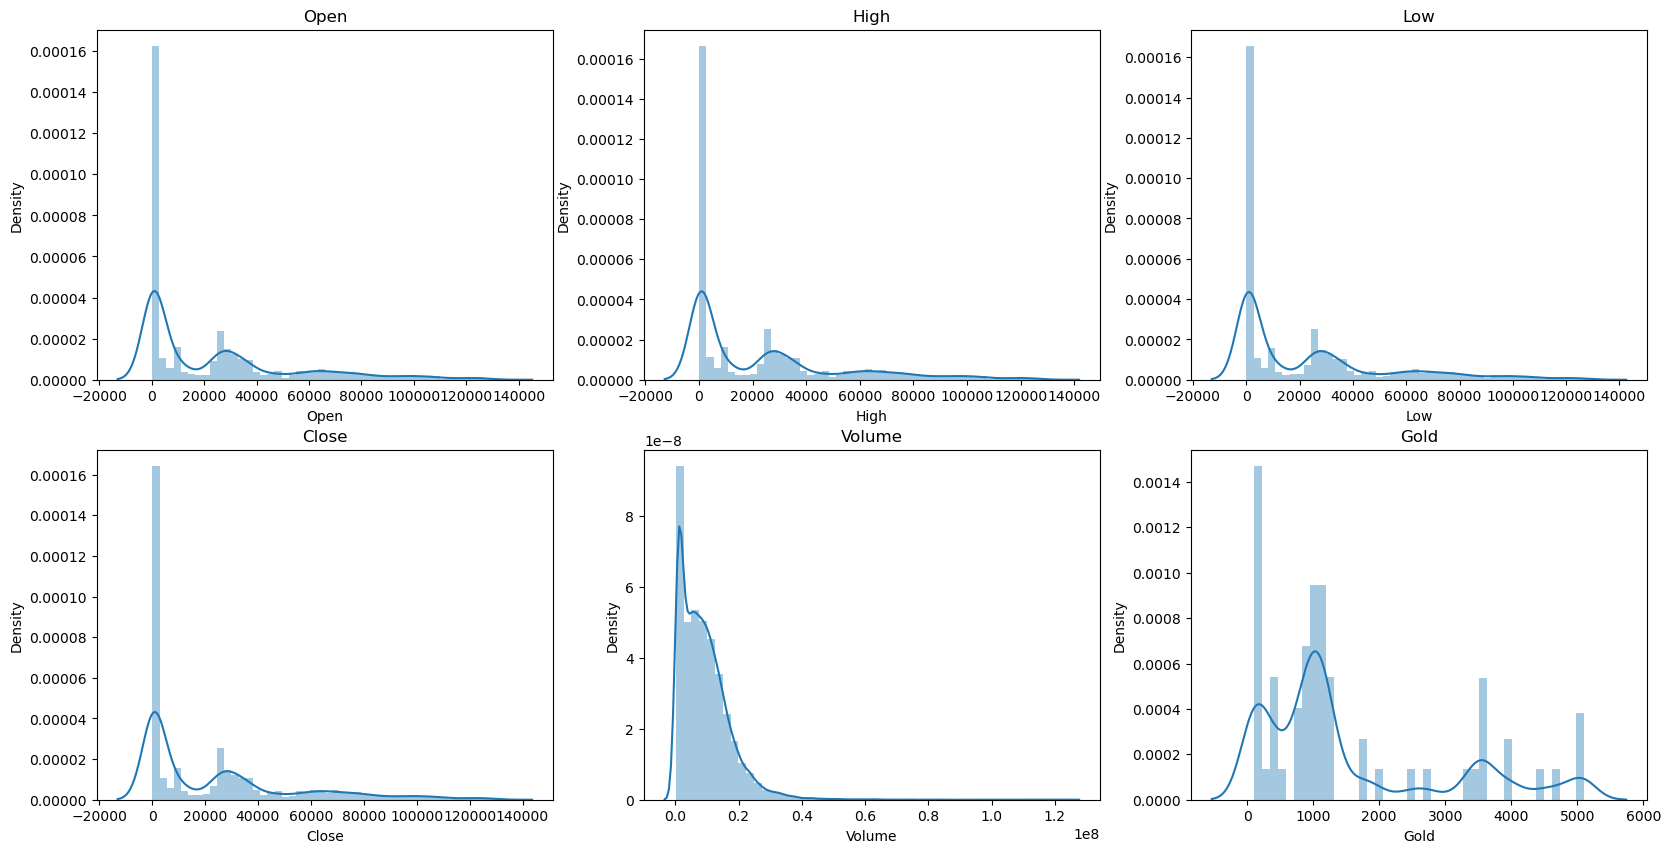

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Gold']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(coke_gold_df[col])
  plt.title(col)
plt.show()

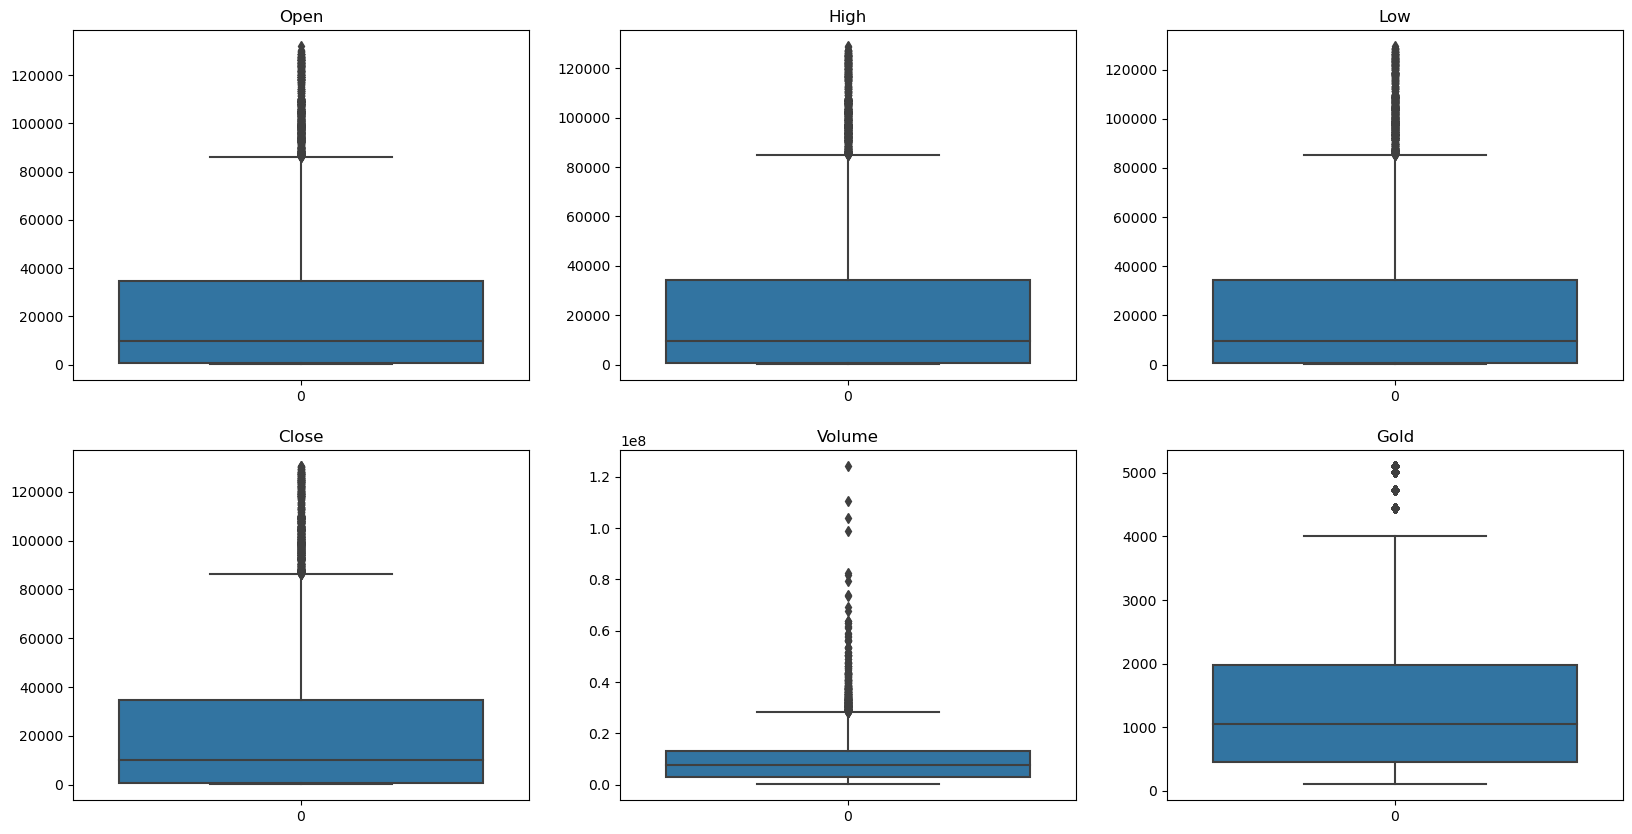

In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(coke_gold_df[col])
  plt.title(col)
plt.show()

In [19]:
coke_gold_df['is_quarter_end'] = np.where(coke_gold_df['Month']%3==0,1,0)
coke_gold_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Gold,is_quarter_end
0,1962-01-02,100.000000,100.000000,100.000000,100.000000,806400,0.0,0,1962,1,2,99.886589,0
1,1962-01-03,98.514939,95.903855,96.286978,97.772025,1574400,0.0,0,1962,1,3,99.886589,0
2,1962-01-04,98.019912,96.626685,98.019912,98.514931,844800,0.0,0,1962,1,4,99.886589,0
3,1962-01-05,98.514907,97.108560,96.039439,96.286948,1420800,0.0,0,1962,1,5,99.886589,0
4,1962-01-08,95.544457,93.012104,93.440438,95.296947,2035200,0.0,0,1962,1,8,99.886589,0


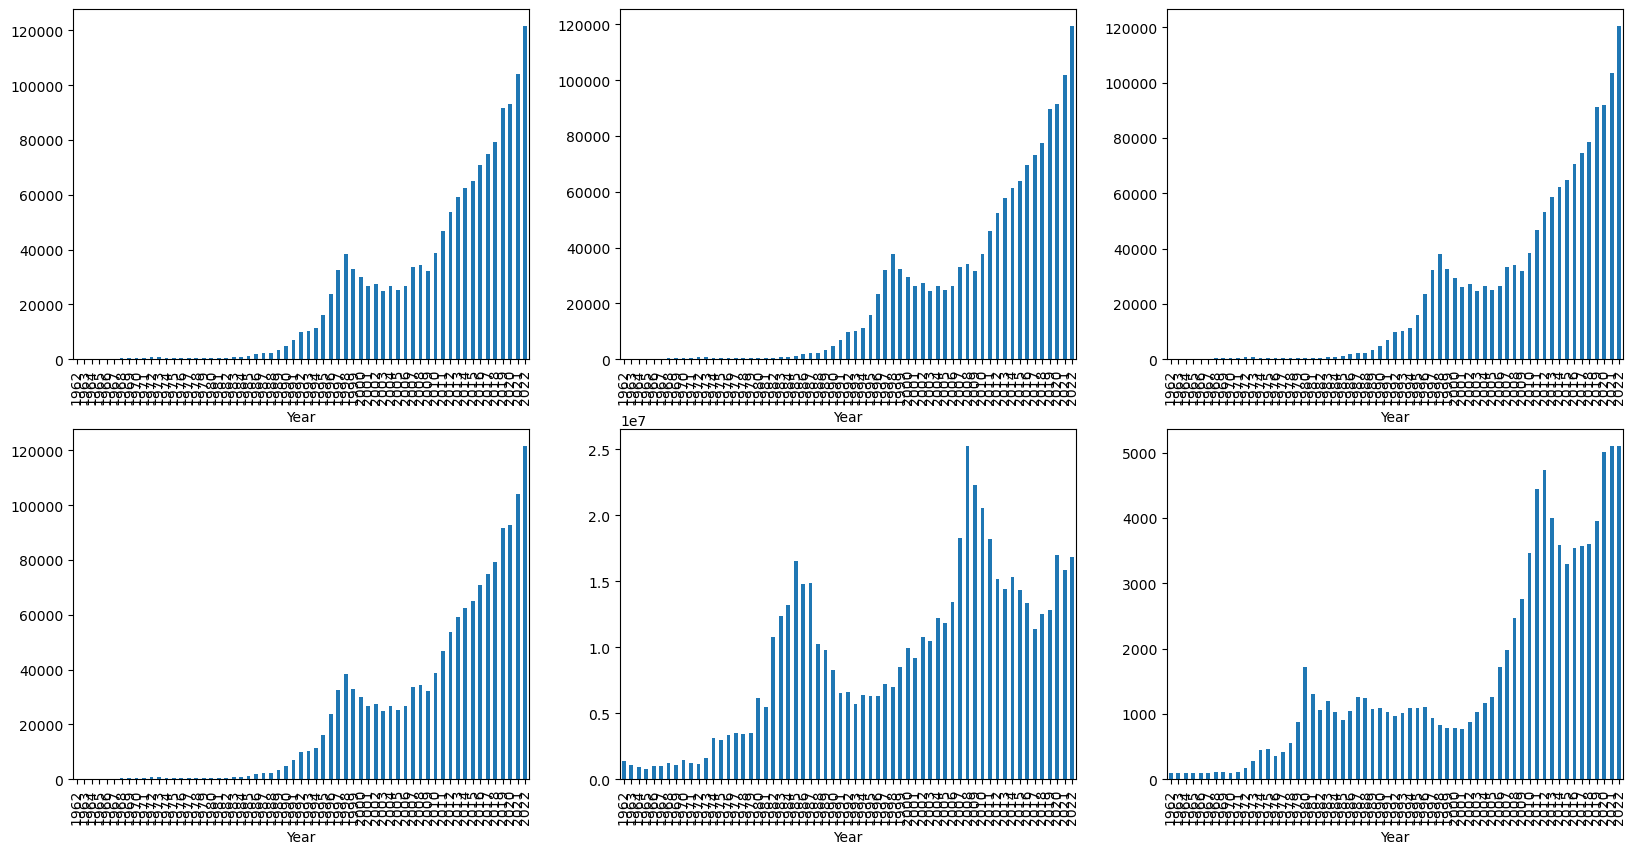

In [20]:
data_grouped = coke_gold_df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume', 'Gold']):
  plt.subplot(2,3,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [21]:
coke_gold_df.groupby('is_quarter_end').mean()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Gold
is_quarter_end,,,,,,,,,,,,
0,1992-05-25 15:20:30.433500416,23595.773501,23150.398689,23404.930956,23600.684062,8.998011e+06,0.000600,0.001278,1991.937875,6.055244,15.732527,1541.447329
1,1992-07-05 10:11:15.437913600,23662.742707,23223.342545,23471.565958,23668.071340,9.418788e+06,0.003812,0.000779,1991.936357,7.420008,15.746399,1542.2334


In [22]:
coke_gold_df['open-close'] = coke_gold_df['Open'] - coke_gold_df['Close']
coke_gold_df['low-high'] = coke_gold_df['Low'] - coke_gold_df['High']
coke_gold_df['target'] = np.where(coke_gold_df['Close'].shift(-1) > coke_gold_df['Close'], 1, 0)


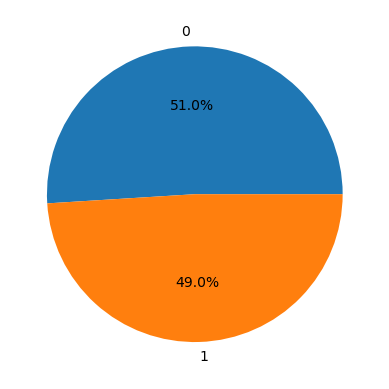

In [23]:
plt.pie(coke_gold_df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


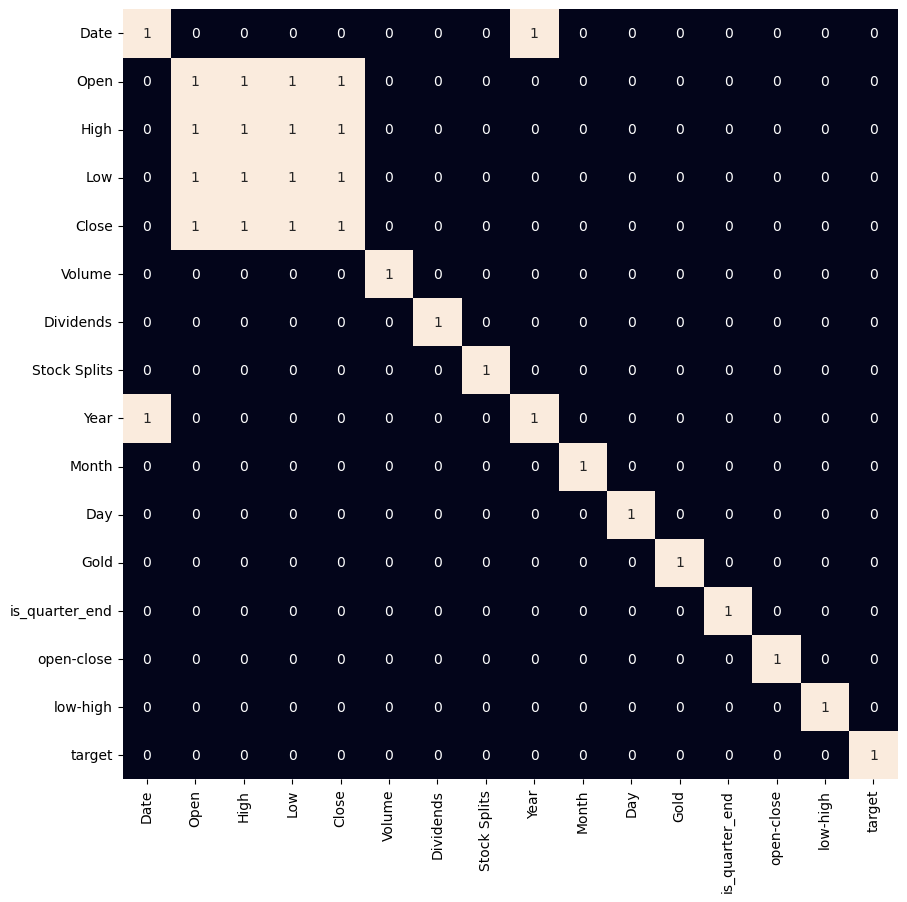

In [24]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(coke_gold_df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [25]:
features = coke_gold_df[['open-close', 'low-high', 'is_quarter_end']]
target = coke_gold_df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(13779, 3) (1532, 3)


In [26]:
models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5203231345031114
Validation Accuracy :  0.5261126933886932

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4814182748497028
Validation Accuracy :  0.4948227991143791

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 